In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# Verständnisfragen
## 1) Implizite Verfahren sollten für Probleme mit einer hohen diskrepanz zwischen der Auflösung der Zeitschritte im Vergelich zu der Auflösung der Ortsschritte verwendet werden.
## 2) 

In [190]:
a = 3.8 * 1e-6
L_plate = 5
L = 2 * L_plate
T_plate_left = 100
T_plate_right = 0
T_left = 100
T_right = 0

Temperature delta smaller than 0.1°C after 39s


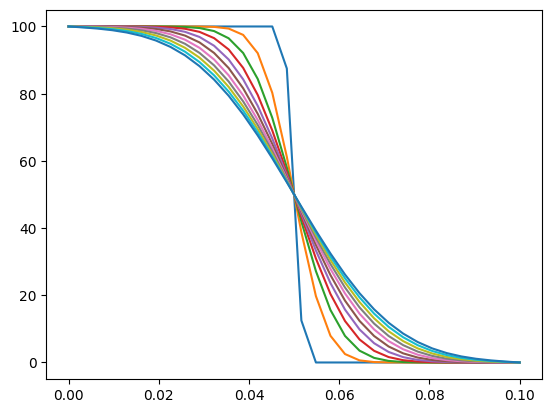

In [191]:
# get lengths
j = 32
l_start = 0
l_end = 0.1
h = (l_end - l_start) / j
ls = np.linspace(start=l_start, stop=l_end, num=j)

# get initial temperatures
us = np.zeros_like(ls)
for idx, l in enumerate(ls):
    if l < 0.05: us[idx] = T_plate_left
    else: us[idx] = T_plate_right

# get times
t_start = 0
t_end = 40
tau_max = (h**2 / (2 * a))
tau = tau_max / 4
ts = np.arange(start=t_start, stop=t_end, step=tau)

# solve with FTCS
for idx_t, t in enumerate(ts):
    un = np.zeros_like(us)
    
    un[0] = T_left
    un[-1] = T_right
    
    for (idx_u, u) in enumerate(us[1:-1]):
        idx_u += 1
        un[idx_u] = us[idx_u] + tau * a / h**2 * (us[idx_u+1] - 2 * us[idx_u] + us[idx_u-1])

    # test for change
    if np.max(np.abs(un - us)) < 0.1:
        print(f"Temperature delta smaller than 0.1°C after {t:.0f}s")
        break
        
    us = un

    if idx_t % (int(len(ts)/10)) == 0:
        plt.plot(ls, us)
    
plt.show()